In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
df = pd.read_csv('processed.cleveland.data', header = None,  names = columns)

In [5]:
df['goal']= df['num'] >=1
df.goal = df.goal.astype(int)

In [6]:
#df.profile_report()

In [7]:
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

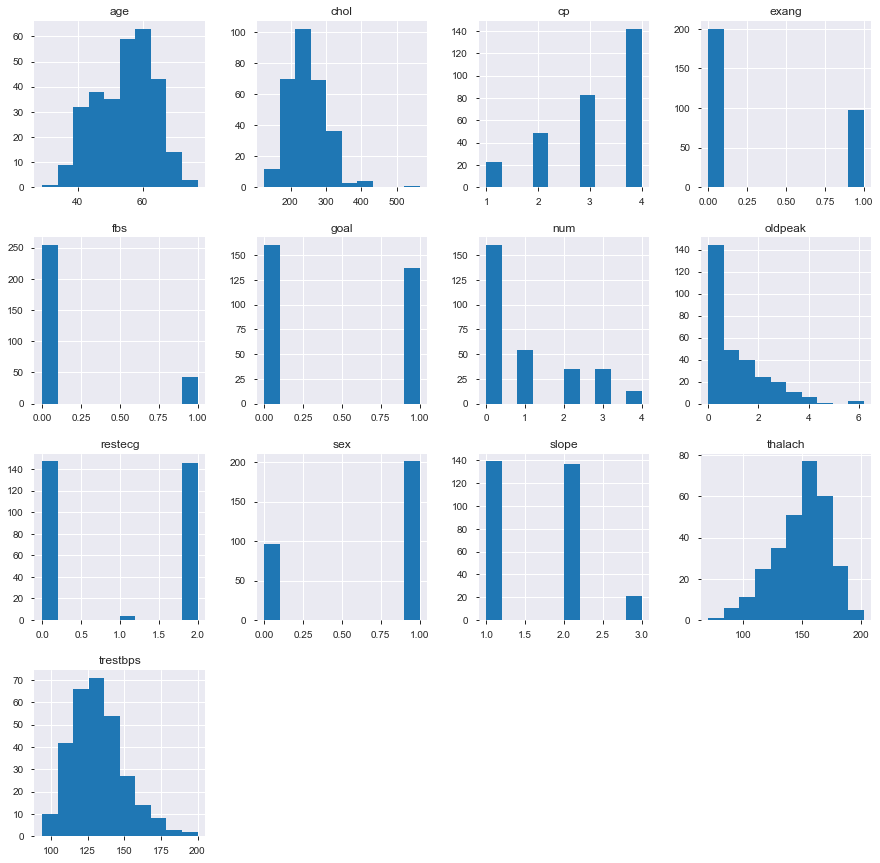

In [36]:

c = df.hist(figsize = (15,15))

In [8]:
y = df['goal']
X = df.drop(columns = ['num', 'goal'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.20, random_state = 42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# the more trees the better it is, the better results
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 250, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 12, 15, 17, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [5, 10, 12],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 212, 225, 237, 250]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf =  RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [22]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [23]:
best_random = rf_random.best_estimator_


In [24]:
predictions = best_random.predict(X_test)


In [25]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [26]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [27]:
accuracy = sum(y_test == predictions)/len(y_test)

In [28]:
'{:0.3f}%'.format(accuracy*100)

'86.667%'

In [29]:
{ df.columns[i]:best_random.feature_importances_[i] for i in range(len(best_random.feature_importances_))} 

{'age': 0.05664421956219946,
 'sex': 0.032960384065355446,
 'cp': 0.1511429702905317,
 'trestbps': 0.03010881821357148,
 'chol': 0.03878632990141236,
 'fbs': 0.0017879096620960968,
 'restecg': 0.007344376131219638,
 'thalach': 0.09696978897862735,
 'exang': 0.059337349731309705,
 'oldpeak': 0.10437602511242253,
 'slope': 0.04046769556245386,
 'ca': 0.221924265465443,
 'thal': 0.15814986732335723}

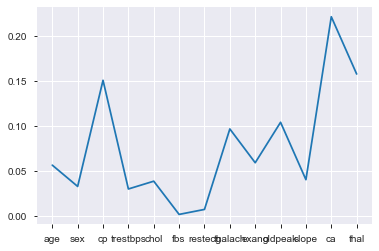

In [40]:
plt.plot(X.columns ,best_random.feature_importances_)

# Report the variance of the accuracy

Nan/Missing values in trees surrogate split